In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [4]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")

# understand the data

In [5]:
# Q1. How big is the data
df.shape
# shape shows that we have 891 rows and 12 columns

(891, 12)

In [6]:
# q2 How does the data look like
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.sample(4)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
406,407,0,3,"Widegren, Mr. Carl/Charles Peter",male,51.0,0,0,347064,7.7500,NaN,S


In [8]:
df.tail()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
# q3 Data types anf some info about columns
df.info()
'''
this shows all the columns 
here we have 3 data types float , int and columns
out of which there are 2 floats
                        5 int
                        5 object
our data consumes 83.7 kb of memory
we can see 9 column doesnot have any null values
and 
Age have 891-714 = 177 null values 
cabin have 891-204 = 687 null values  (cabin has most null or empty val)
Embarked have 891-889= 2 null values 
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


'\nthis shows all the columns \nhere we have 3 data types float , int and columns\nout of which there are 2 floats\n                        5 int\n                        5 object\nour data consumes 83.7 kb of memory\nwe can see 9 column doesnot have any null values\nand \nAge have 891-714 = 177 null values \ncabin have 891-204 = 687 null values  (cabin has most null or empty val)\nEmbarked have 891-889= 2 null values \n'

In [10]:
# is there any missing values
df.isnull().sum()
# this hows that age have 177 null values
# this shows cabin have 687 null values 
# this shows Embarked have 2 null values 
# we also seen in above shell by ourself find out null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# q5 how does data looks mathematically or statistically
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# q6 are there any duplicate values
df.duplicated().sum()
# here we have no duplicate rows in our dataset

0

In [13]:
# q7 . is there any correlation between columns

# Univariate Analysis

In [14]:
#Categorical Data 

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt 

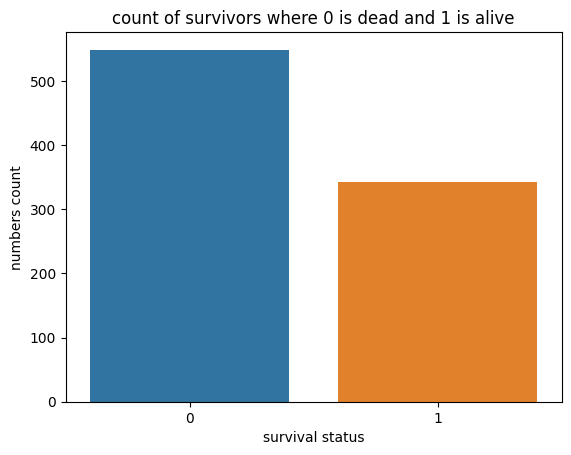

In [16]:
# Countplot
# in future we can first counplot on categorical data
sns.countplot(x='Survived', data=df)
plt.title('count of survivors where 0 is dead and 1 is alive')
plt.xlabel('survival status')
plt.ylabel('numbers count')
plt.show()
# This will show no. of counts of dead and alive
# more than 500 were dead 
# more than 300 were alive

In [17]:
df['Survived'].value_counts()
# we can see here 549 were dead and 342 were alive

Survived
0    549
1    342
Name: count, dtype: int64

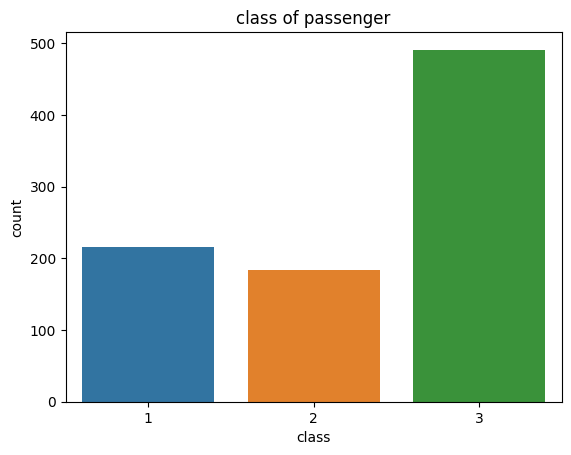

In [18]:
# pclass means in data firstclass, 2ndclass, 3rd class 
sns.countplot(x='Pclass', data=df)
plt.title('class of passenger')
plt.xlabel('class')
plt.ylabel('count')
plt.show()


In [19]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

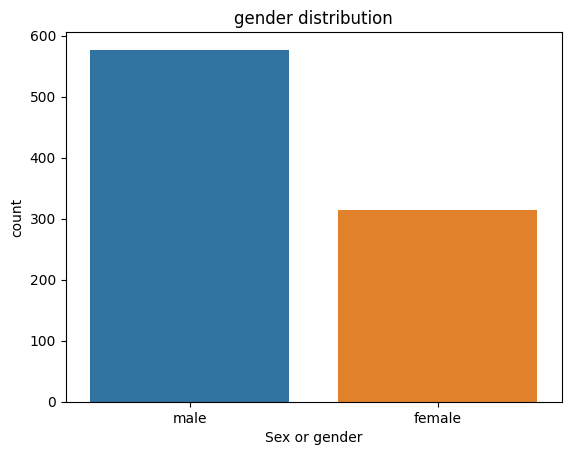

In [20]:
sns.countplot(x='Sex', data=df)
plt.title('gender distribution')
plt.ylabel('count')
plt.xlabel('Sex or gender')
plt.show()

In [21]:
df['Sex'].value_counts()
# we can see 577 were male and 314 were female

Sex
male      577
female    314
Name: count, dtype: int64

In [22]:
577+314

891

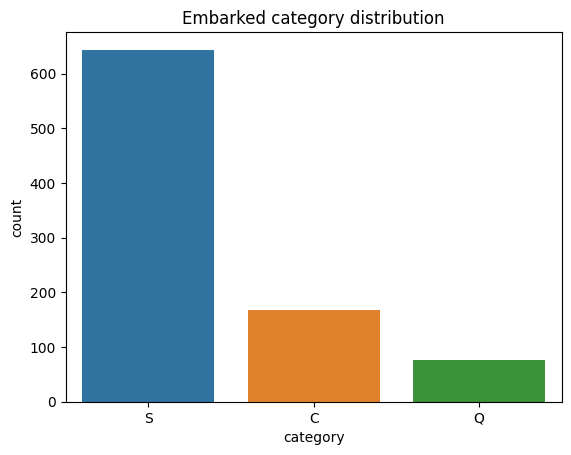

In [23]:
# from where they joined titanic , or kaha bata uniharu titanic ma chade
sns.countplot(x='Embarked', data=df)
plt.title('Embarked category distribution')
plt.xlabel('category')
plt.ylabel('count')
plt.show()

In [24]:
df['Embarked'].value_counts()
# we can see we have S = 644,C=168 and Q=77 category in a embarked

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [25]:
644+168+77
# two entries missing in embarked

889

# piechart

<Axes: ylabel='count'>

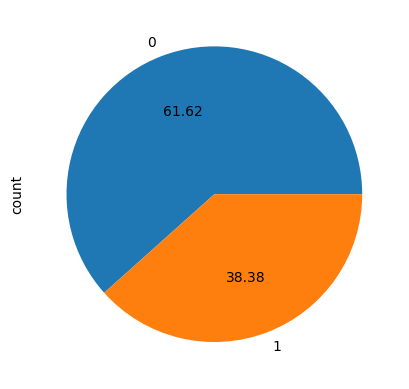

In [26]:

df['Survived'].value_counts().plot(kind='pie', autopct='%.2f')
# Here we can see dead percentage are more than alive
# 61.62 5 are dead and 38.38 are alive

<Axes: ylabel='count'>

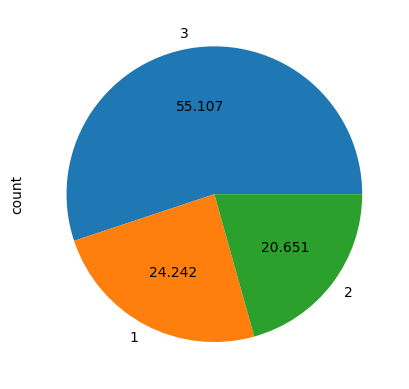

In [27]:
# Piechart of pclass
df['Pclass'].value_counts().plot(kind='pie',autopct='%.3f')

<Axes: ylabel='count'>

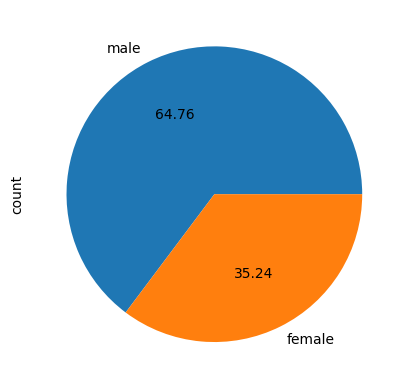

In [28]:
# piechart of Sex
df['Sex'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

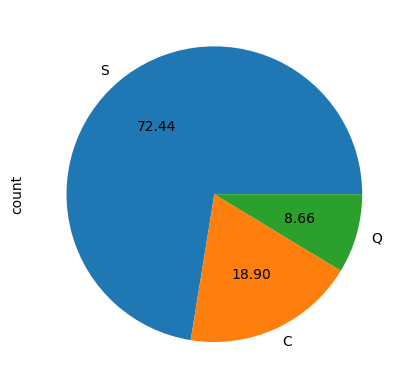

In [29]:
# piechart of Embarked
df['Embarked'].value_counts().plot(kind='pie',autopct='%.2f')

# Numerical Data

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

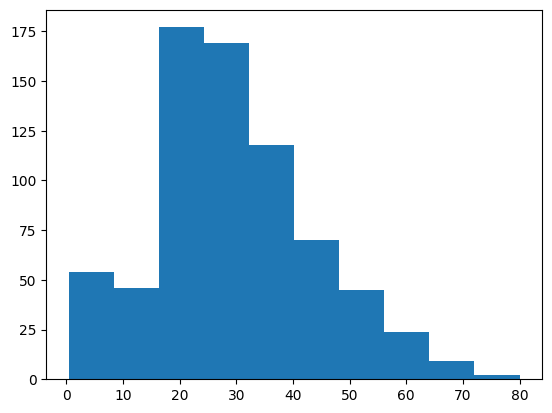

In [34]:
import matplotlib.pyplot as plt
plt.hist(df['Age'])
# to understand the distribution of Numerical data 

(array([24.,  6., 14.,  3.,  7.,  8.,  6.,  3.,  7., 22., 13., 51., 40.,
        27., 46., 24., 36., 47., 27., 35., 17., 34., 29., 11., 27.,  8.,
        18.,  9., 17., 18.,  6., 17.,  6.,  9.,  7.,  2.,  7.,  4.,  7.,
         4.,  3.,  1.,  0.,  2.,  3.,  0.,  1.,  0.,  0.,  1.]),
 array([ 0.42  ,  2.0116,  3.6032,  5.1948,  6.7864,  8.378 ,  9.9696,
        11.5612, 13.1528, 14.7444, 16.336 , 17.9276, 19.5192, 21.1108,
        22.7024, 24.294 , 25.8856, 27.4772, 29.0688, 30.6604, 32.252 ,
        33.8436, 35.4352, 37.0268, 38.6184, 40.21  , 41.8016, 43.3932,
        44.9848, 46.5764, 48.168 , 49.7596, 51.3512, 52.9428, 54.5344,
        56.126 , 57.7176, 59.3092, 60.9008, 62.4924, 64.084 , 65.6756,
        67.2672, 68.8588, 70.4504, 72.042 , 73.6336, 75.2252, 76.8168,
        78.4084, 80.    ]),
 <BarContainer object of 50 artists>)

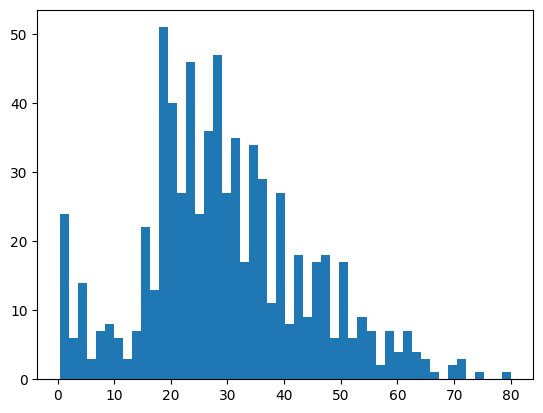

In [33]:
plt.hist(df['Age'], bins = 50)

/tmp/ipykernel_47/2089824944.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

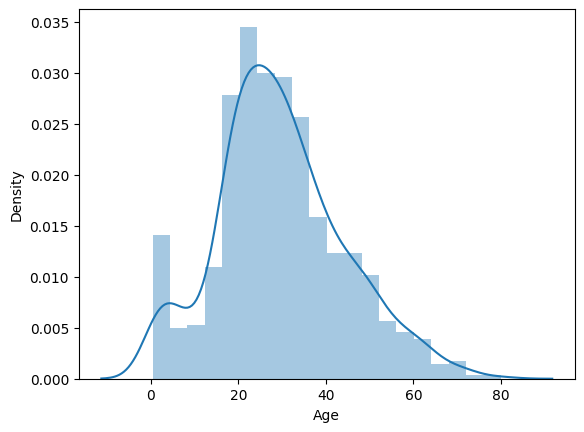

In [36]:
# distplot
sns.distplot(df['Age'])

# Probability Density function

In [37]:
# Boxplot
'''
Box plot gives five number summary
median
percentiles
q1 = 25 percentile values ie 
q3 = 75 percentile
mininum value q1 - 1.5 * interquartile range
max value q3 + 1.5 * interquartile range 
outliers can be seen ie those outside the minimun and mx value or outside box plot


box plot also show skewness

''' 

'\nBox plot gives five number summary\nmedian\npercentiles\nq1 = 25 percentile values ie \nq3 = 75 percentile\nmininum value q1 - 1.5 * interquartile range\nmax value q3 + 1.5 * interquartile range \noutliers can be seen ie those outside the minimun and mx value or outside box plot\n\n'

<Axes: >

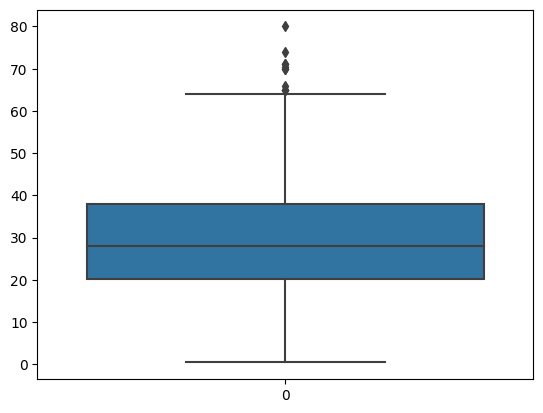

In [38]:
sns.boxplot(df['Age'])
# here are some outliers

<Axes: >

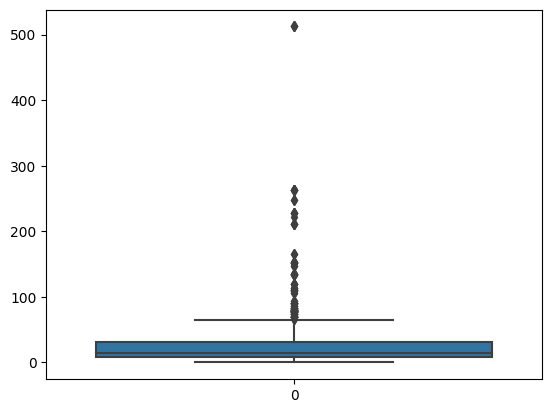

In [40]:
sns.boxplot(df['Fare'])
# Here we can see the outliers are more

In [41]:
df['Age'].min()

0.42

In [42]:
df['Age'].max()

80.0

In [43]:
df['Age'].mean()

29.69911764705882

In [44]:
df['Age'].median()

28.0

In [46]:
df['Age'].skew()
# if it is 0 it is perfectly skewed ie symmetrical
# if it is +ve skewed the it is toward right side
# if it is -ve skewed then it is toward left side


0.38910778230082693